<a href="https://colab.research.google.com/github/Nico412-cyber/msci151/blob/main/CW4_Nicholas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

excel_file_path = '/content/sample_data/MSCI151 Data.xlsx'
df = pd.read_excel(excel_file_path)

print(df.columns)

Index(['id', 'Profitability', 'debt', 'RnD', 'Firm Age', 'Firm Size',
       'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender'],
      dtype='object')


In [2]:
# Prepare the data
features = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender']
target = 'Profitability'

X = df[features]
y = df[target]

In [22]:
import statsmodels.api as sm

# Prepare the data with the specified features for OLS
features_ols_full = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'foreign sales', 'CEO Experience', 'CEO education', 'CEO Gender', 'marketing', 'Product sentiment', 'Politicians on Board']
target_ols_full = 'Profitability'

X_ols_full = df_new[features_ols_full]
y_ols_full = df_new[target_ols_full]

# Add a constant (intercept) to the features
X_ols_full_with_intercept = sm.add_constant(X_ols_full)

# Create and fit the OLS model with robust standard errors
model_ols_full = sm.OLS(y_ols_full, X_ols_full_with_intercept)
results_ols_full = model_ols_full.fit(cov_type='HC1') # HC1 is a common type of robust standard error

# Print the summary of the regression results
print(results_ols_full.summary())

                            OLS Regression Results                            
Dep. Variable:          Profitability   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     4.180
Date:                Wed, 08 Oct 2025   Prob (F-statistic):           3.68e-05
Time:                        05:47:57   Log-Likelihood:                -464.29
No. Observations:                 122   AIC:                             952.6
Df Residuals:                     110   BIC:                             986.2
Df Model:                          11                                         
Covariance Type:                  HC1                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -8.8787 

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 97
Testing set size: 25


In [4]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [5]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 113.67692451119993
R-squared: -1.4687530565153741


In [6]:
import pandas as pd

excel_file_path_new = '/content/MSCI151 Data Nicholas CW4.xlsx'
df_new = pd.read_excel(excel_file_path_new)

print(df_new.columns)

Index(['id', 'Profitability', 'debt', 'RnD', 'Firm Age', 'Firm Size',
       'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender',
       'marketing', 'Product sentiment', 'Politicians',
       'Politicians on Board'],
      dtype='object')


# Task
Perform a random forest regression on the dataset "/content/MSCI151 Data Nicholas CW4.xlsx" to predict 'Profitability' using the features 'debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'marketing', 'Product sentiment', 'Politicians', and 'Politicians on Board'. Split the data into 80% for training and 20% for testing.

## Prepare the data

### Subtask:
Select the features (independent variables) and the target variable (dependent variable) from the new dataset.


**Reasoning**:
Select the features and target variables from the new dataset.



In [7]:
features_new = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'marketing', 'Product sentiment', 'Politicians', 'Politicians on Board']
target_new = 'Profitability'

X_new = df_new[features_new]
y_new = df_new[target_new]

## Split the data

### Subtask:
Divide the new dataset into training and testing sets using an 80/20 split.


**Reasoning**:
Divide the new dataset into training and testing sets using an 80/20 split.



In [8]:
from sklearn.model_selection import train_test_split

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

print(f"Training set size (features): {X_train_new.shape}")
print(f"Testing set size (features): {X_test_new.shape}")
print(f"Training set size (target): {y_train_new.shape}")
print(f"Testing set size (target): {y_test_new.shape}")

Training set size (features): (97, 12)
Testing set size (features): (25, 12)
Training set size (target): (97,)
Testing set size (target): (25,)


## Train the model

### Subtask:
Train a Random Forest Regressor model using the new training data.


**Reasoning**:
Train a Random Forest Regressor model using the new training data.



In [9]:
from sklearn.ensemble import RandomForestRegressor

model_new = RandomForestRegressor(n_estimators=100, random_state=42)
model_new.fit(X_train_new, y_train_new)

RandomForestRegressor(random_state=42)

## Evaluate the model

### Subtask:
Assess the performance of the new trained model using appropriate metrics on the new testing data.


**Reasoning**:
Calculate and print the MSE and R-squared metrics for the new model's predictions on the new test set.



In [10]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_new = model_new.predict(X_test_new)

mse_new = mean_squared_error(y_test_new, y_pred_new)
r2_new = r2_score(y_test_new, y_pred_new)

print(f"Mean Squared Error (New Model): {mse_new}")
print(f"R-squared (New Model): {r2_new}")

Mean Squared Error (New Model): 122.67761100679995
R-squared (New Model): -1.664223442368045


## Summary:

### Data Analysis Key Findings

*   The dataset was split into 80% for training (97 samples) and 20% for testing (25 samples).
*   A Random Forest Regressor model was trained to predict 'Profitability' using the specified features.
*   The model's performance on the test set resulted in a Mean Squared Error (MSE) of approximately 122.68.
*   The R-squared ($R^2$) score on the test set was approximately -1.66.

### Insights or Next Steps

*   The negative R-squared value indicates that the model performs worse than a simple horizontal line representing the mean of the target variable, suggesting that the current model is not suitable for predicting 'Profitability' with the selected features.
*   Further steps should involve investigating the reasons for the poor performance, potentially by exploring feature engineering, trying different regression models, or examining the dataset for outliers or non-linear relationships.


## Feature Importance

### Subtask:
Display the feature importance scores from the trained Random Forest model.

**Reasoning**:
The feature importance scores from the Random Forest model indicate the relative contribution of each feature to the model's predictions. Displaying these scores will help understand which features are most influential in predicting 'Profitability'.

In [11]:
# Get feature importances
feature_importances = model_new.feature_importances_

# Create a pandas Series for better visualization
importance_series = pd.Series(feature_importances, index=X_new.columns)

# Sort the features by importance
sorted_importance_series = importance_series.sort_values(ascending=False)

# Print the feature importances
print("Feature Importances (New Model):")
print(sorted_importance_series)

Feature Importances (New Model):
debt                    0.291555
CEO Gender              0.151702
Firm Size               0.141639
RnD                     0.087185
Politicians             0.064841
Product sentiment       0.056034
CEO Experience          0.050795
foreign sales           0.044061
Firm Age                0.041854
marketing               0.039239
CEO education           0.026592
Politicians on Board    0.004502
dtype: float64


## Visualize Feature Importance

### Subtask:
Create a bar chart to visualize the feature importance scores.

**Reasoning**:
Visualizing feature importance scores with a bar chart makes it easier to compare the relative importance of each feature at a glance.

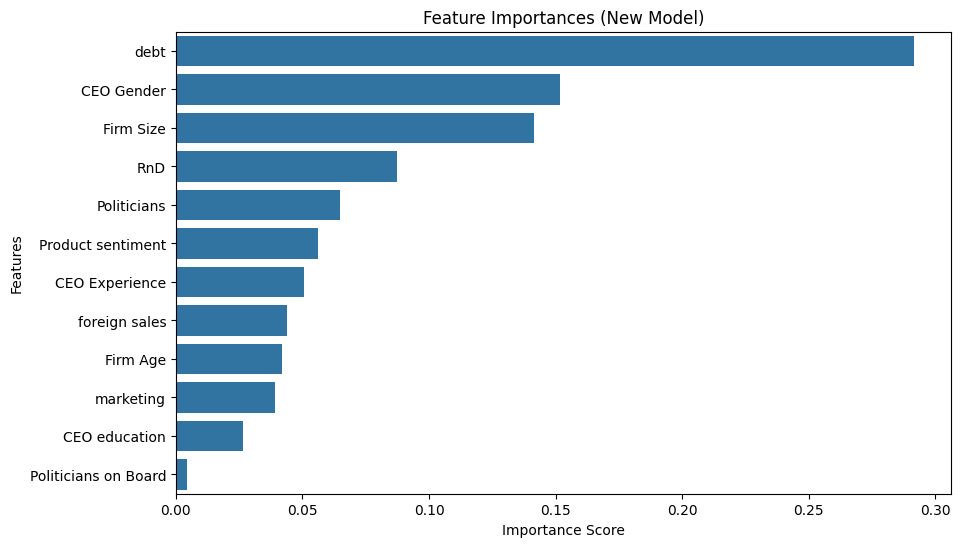

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importance_series.values, y=sorted_importance_series.index)
plt.title('Feature Importances (New Model)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [13]:
from sklearn.linear_model import Lasso
import numpy as np

# Initialize and train the LASSO model
# You might need to tune the 'alpha' parameter
lasso = Lasso(alpha=1.0)
lasso.fit(X_train_new, y_train_new)

# Get the coefficients
lasso_coefficients = lasso.coef_

# Display features and their corresponding coefficients
print("LASSO Coefficients:")
for feature, coef in zip(X_new.columns, lasso_coefficients):
    print(f"{feature}: {coef:.4f}")

# Identify features with non-zero coefficients (selected by LASSO)
selected_features_lasso = X_new.columns[lasso_coefficients != 0]
print("\nFeatures selected by LASSO:")
print(selected_features_lasso)

LASSO Coefficients:
debt: -0.2455
RnD: 0.0907
Firm Age: -0.0000
Firm Size: 0.1991
CEO Experience: 0.0000
foreign sales: -0.0048
CEO education: 0.2732
CEO Gender: 5.6855
marketing: 0.0000
Product sentiment: 0.0000
Politicians: -0.0000
Politicians on Board: -0.0000

Features selected by LASSO:
Index(['debt', 'RnD', 'Firm Size', 'foreign sales', 'CEO education',
       'CEO Gender'],
      dtype='object')


## Feature Importance (Selected Features Model)

### Subtask:
Display the feature importance scores from the new Random Forest model trained with selected features.

**Reasoning**:
Displaying the feature importance scores for the model trained with selected features will show the relative importance of these specific features in predicting 'Profitability'.

In [18]:
# Get feature importances for the selected features model
feature_importances_selected = model_selected.feature_importances_

# Create a pandas Series for better visualization
importance_series_selected = pd.Series(feature_importances_selected, index=X_selected.columns)

# Sort the features by importance
sorted_importance_series_selected = importance_series_selected.sort_values(ascending=False)

# Print the feature importances
print("Feature Importances (Selected Features Model):")
print(sorted_importance_series_selected)

Feature Importances (Selected Features Model):
Firm Size        0.315457
foreign sales    0.242265
CEO Gender       0.202385
Firm Age         0.200954
CEO education    0.038939
dtype: float64


## Evaluate the model (selected features)

### Subtask:
Assess the performance of the new trained model using appropriate metrics on the new testing data.

**Reasoning**:
Calculate and print the MSE and R-squared metrics for the new model's predictions on the new test set.

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_selected = model_selected.predict(X_test_selected)

mse_selected = mean_squared_error(y_test_selected, y_pred_selected)
r2_selected = r2_score(y_test_selected, y_pred_selected)

print(f"Mean Squared Error (Selected Features Model): {mse_selected}")
print(f"R-squared (Selected Features Model): {r2_selected}")

Mean Squared Error (Selected Features Model): 104.47849377519996
R-squared (Selected Features Model): -1.2689882045694767


## Train the model (selected features)

### Subtask:
Train a Random Forest Regressor model using the training data with the selected features.

**Reasoning**:
Train a Random Forest Regressor model using the new training data containing only the selected features.

In [16]:
from sklearn.ensemble import RandomForestRegressor

model_selected = RandomForestRegressor(n_estimators=100, random_state=42)
model_selected.fit(X_train_selected, y_train_selected)

RandomForestRegressor(random_state=42)

## Split the data (selected features)

### Subtask:
Divide the dataset with the selected features into training and testing sets using an 80/20 split.

**Reasoning**:
Divide the dataset with the selected features into training and testing sets using an 80/20 split, similar to the previous model.

In [15]:
from sklearn.model_selection import train_test_split

X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

print(f"Training set size (selected features): {X_train_selected.shape[0]}")
print(f"Testing set size (selected features): {X_test_selected.shape[0]}")

Training set size (selected features): 97
Testing set size (selected features): 25


## Prepare the data (selected features)

### Subtask:
Select the specified features and the target variable for the new Random Forest model.

**Reasoning**:
Select the features and target variables from the new dataset (`df_new`) for the new Random Forest model based on the user's request.

In [14]:
# Prepare the data with selected features
features_selected = ['Firm Age', 'Firm Size', 'foreign sales', 'CEO education', 'CEO Gender']
target_selected = 'Profitability'

X_selected = df_new[features_selected]
y_selected = df_new[target_selected]

print(f"Selected features: {features_selected}")
print(f"Target variable: {target_selected}")
print(f"Shape of selected features data: {X_selected.shape}")
print(f"Shape of target variable data: {y_selected.shape}")

Selected features: ['Firm Age', 'Firm Size', 'foreign sales', 'CEO education', 'CEO Gender']
Target variable: Profitability
Shape of selected features data: (122, 5)
Shape of target variable data: (122,)


In [20]:
import statsmodels.api as sm

# Add a constant (intercept) to the features
X_selected_with_intercept = sm.add_constant(X_selected)

# Create and fit the OLS model with robust standard errors
model_ols = sm.OLS(y_selected, X_selected_with_intercept)
results_ols = model_ols.fit(cov_type='HC1') # HC1 is a common type of robust standard error

# Print the summary of the regression results
print(results_ols.summary())

                            OLS Regression Results                            
Dep. Variable:          Profitability   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     7.333
Date:                Wed, 08 Oct 2025   Prob (F-statistic):           5.27e-06
Time:                        05:27:59   Log-Likelihood:                -472.76
No. Observations:                 122   AIC:                             957.5
Df Residuals:                     116   BIC:                             974.3
Df Model:                           5                                         
Covariance Type:                  HC1                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -5.3020     19.110     -0.277

In [23]:
import statsmodels.api as sm

# Prepare the data with the specified features for OLS
features_ols = [ 'debt', 'RnD', 'Firm Age', 'Firm Size', 'foreign size', 'foreign sales', 'CEO Experience', 'CEO education', 'CEO Gender', 'marketing', 'product', 'sentiment' 'Politicians on Board']
target_ols = 'Profitability'

X_ols = df_new[features_ols]
y_ols = df_new[target_ols]

# Add a constant (intercept) to the features
X_ols_with_intercept = sm.add_constant(X_ols)

# Create and fit the OLS model with robust standard errors
model_ols_new = sm.OLS(y_ols, X_ols_with_intercept)
results_ols_new = model_ols_new.fit(cov_type='HC1') # HC1 is a common type of robust standard error

# Print the summary of the regression results
print(results_ols_new.summary())

KeyError: "['foreign size', 'product', 'sentimentPoliticians on Board'] not in index"

## Visualize Feature Importance (Selected Features Model)

### Subtask:
Create a bar chart to visualize the feature importance scores for the model trained with selected features.

**Reasoning**:
Visualizing feature importance scores with a bar chart makes it easier to compare the relative importance of each feature at a glance for the model trained with selected features.

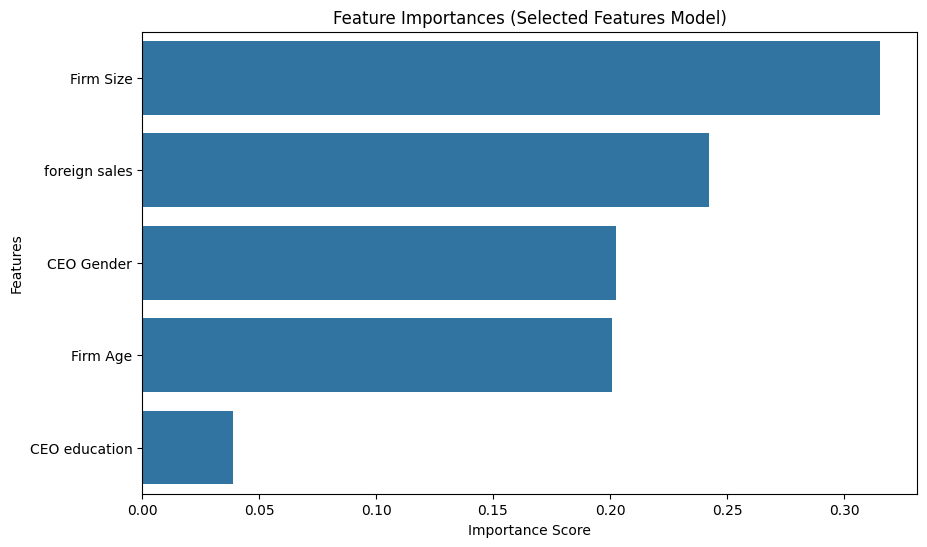

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot of feature importances for the selected features model
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importance_series_selected.values, y=sorted_importance_series_selected.index)
plt.title('Feature Importances (Selected Features Model)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()